<a href="https://colab.research.google.com/github/GouravRohit/Python-Notebook/blob/main/Module_2(Capstone_project_EDA)_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **AirBnb Bookings Analysis**



**Project Type**    - Exploratory Data Analysis(EDA)
##### **Contribution**    - Individual (GOURAV ROHIT)

# **Problem Statement**


**Business Context**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.

#### **Define Your Business Objective?**


*Optimize security, decisions, marketing, innovation.*

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read the data
file_path = "/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
airbnb_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
airbnb_df.shape

### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(airbnb_df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is an Airbnb listings dataset, and we aim to analyze the data to uncover insights regarding guest and host behaviors, pricing strategies, and booking patterns.

The goal is to understand key factors influencing listing performance and to leverage these insights for better business decisions, enhanced security, improved marketing strategies, and innovative service offerings.

The dataset comprises 48895 rows and 16 columns. The dataset includes a mix of categorical and numeric values such as listing ID, host ID, neighborhood, room type, price, minimum nights, number of reviews, and availability. This diverse dataset allows for a comprehensive exploration of various aspects of Airbnb listings, including geographical trends, pricing influences, guest satisfaction, and host activity.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns

In [ ]:
# Dataset Describe
airbnb_df.describe(include="all")

### Variables Description

1.id : Unique ID for each listing.

2.name : Name of the listing.

3.host_id : Unique identifier for each host.

4.host_name : Name of the host.

5.neighbourhood_group: General location of the listing.

6.neighborhood : Specific area of the listing.

7.latitude : Latitude coordinate of the listing location.

8.longitude : Longitude coordinate of the listing location.

9.room_type : Type of room offered (e.g., entire home, private room, shared room).

10.price : Price per night for the listing.

11.minimum_nights : Minimum number of nights required for booking.

12.number_of_reviews : Count of reviews received.

13.last_review : Date of the most recent review.

14.reviews_per_month : Average number of reviews per month.

15.calculated_host_listings_count : Total count of listings the host has.

16.availability_365 : Availability of the listing in the next 365 days.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in airbnb_df.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb_df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Creating a copy of current dataset and assigning to df
df = airbnb_df.copy()
# Checking shape of true value:
df.shape

In [ ]:
#Checking for Missing Values:
missing_values = df.isnull().sum()
print(missing_values)


In [ ]:
#Handling Missing Values:
df.dropna(inplace=True)
df.isnull().sum()


In [ ]:
#Dropping Irrelevant Columns:
# Check if columns exist before dropping
columns_to_drop = ['id', 'name', 'host_name']
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    df.drop(existing_columns, axis=1, inplace=True)
    print("Dropped columns:", existing_columns)
else:
    print("None of the specified columns were found in the DataFrame.")



In [ ]:
#Encoding Categorical Variables:
# Check if columns exist before encoding
columns_to_encode = ['neighbourhood_group', 'neighbourhood', 'room_type']
existing_columns = [col for col in columns_to_encode if col in df.columns]

if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
    print("Encoded columns:", existing_columns)
else:
    print("None of the specified columns were found in the DataFrame.")


In [ ]:
#Summary Statistics:
summary_stats = df.describe()
print(summary_stats)

In [ ]:
#Checking for Duplicate Values:
duplicate_values = df.duplicated().sum()
print(duplicate_values)

In [ ]:
#Dropping Duplicate Values:
df.drop_duplicates(inplace=True)

In [ ]:
#Correlation Analysis:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
print(correlation_matrix)

In [ ]:
#Extracting Date Features:
#Check if 'last_review' column exists before processing
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['last_review_year'] = df['last_review'].dt.year
    df['last_review_month'] = df['last_review'].dt.month
else:
    print("Column 'last_review' not found in the DataFrame.")

In [ ]:
#Price Binning:
price_bins = [0, 50, 100, 150, 200, df['price'].max()]
price_labels = ['0-50', '51-100', '101-150', '151-200', '200+']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

In [ ]:
#Review Score Calculation:
df['review_score'] = df['number_of_reviews'] * df['reviews_per_month']

In [ ]:
#Host Activity Analysis:
host_bins = [0, 1, 5, df['calculated_host_listings_count'].max()]
host_labels = ['low', 'medium', 'high']
df['host_activity'] = pd.cut(df['calculated_host_listings_count'], bins=host_bins, labels=host_labels)

In [ ]:
#Calculating Listing Age:
if 'last_review' in df.columns:
    df['listing_age'] = (pd.to_datetime('today') - df['last_review']).dt.days
else:
    print("Column 'last_review' not found. Cannot calculate listing age.")


In [ ]:
#Nightly Revenue Calculation:
df['nightly_revenue'] = df['price'] * df['minimum_nights']

In [ ]:
#Availability Analysis:
availability_bins = [0, 90, 180, 270, 365]
availability_labels = ['low', 'medium', 'high', 'very high']
df['availability_category'] = pd.cut(df['availability_365'], bins=availability_bins, labels=availability_labels)

In [ ]:
#Distance from City Center Calculation:
df['distance_from_center'] = (df['latitude'] ** 2 + df['longitude'] ** 2) ** 0.5

In [ ]:
#Length of Stay Calculation:
df['avg_length_of_stay'] = df['number_of_reviews'] / (df['reviews_per_month'] + 1)

In [ ]:
#Revenue Estimation:
df['potential_revenue'] = df['price'] * df['minimum_nights'] * df['availability_365'] / 365

In [ ]:
#Host Tenure Calculation:
# Verify if the 'last_review' column exists in your DataFrame
print(df.columns)

# If it doesn't exist, you might need to load or create it
# For example, if you have a date column 'last_review_date', you can convert it:
if 'last_review_date' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review_date'])

# Once you've confirmed the column exists, proceed with the calculation:
if 'last_review' in df.columns:
    df['host_tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['last_review']))

In [ ]:
#Price per Bedroom Calculation:
if 'bedrooms' in df.columns:
    df['price_per_bedroom'] = df['price'] / df['bedrooms']
else:
    df['price_per_bedroom'] = np.nan


In [ ]:
#Occupancy Rate Estimation:
df['occupancy_rate'] = df['reviews_per_month'] / (df['availability_365'] / 30)


### What all manipulations have you done and insights you found?

According to my analysis, the goal is to understand the dynamics of Airbnb listings, including factors that influence popularity, pricing, and availability, through comprehensive data manipulations and graphical representations. We aim to uncover patterns and insights that can guide hosts in improving their listings and inform Airbnb's strategic decisions. To achieve this, I performed extensive data wrangling to clean and enrich the dataset. This involved handling missing values, encoding categorical variables, and creating new features such as price ranges, review scores, and host activity levels. By clustering geographic locations and calculating listing age and nightly revenue, I aimed to identify trends and outliers. Additionally, analyzing review sentiments and calculating occupancy rates provided deeper insights into guest satisfaction and booking efficiency. Here are the detailed steps and findings from my analysis:

1. **Checking for Missing Values**: Identified and handled missing values to ensure a complete dataset.
2. **Dropping Irrelevant Columns**: Removed unnecessary columns to focus on relevant data.
3. **Encoding Categorical Variables**: Converted categorical variables into a format suitable for numerical analysis.
4. **Checking for Duplicate Values**: Ensured data integrity by removing duplicate entries.
5. **Extracting Date Features**: Created new date-related features to analyze temporal trends.
6. **Price Binning**: Categorized listings into different price ranges for better market segmentation.
7. **Calculating Review Score**: Combined number of reviews and reviews per month to measure listing popularity.
8. **Host Activity Analysis**: Classified hosts based on their activity levels to understand engagement.
9. **Calculating Listing Age**: Determined the age of listings to assess their relevance.
10. **Nightly Revenue Calculation**: Estimated the financial performance of listings.
11. **Availability Analysis**: Analyzed booking patterns and seasonality based on availability.
12. **Length of Stay Calculation**: Calculated average length of stay to understand guest preferences.
13. **Distance from City Center Calculation**: Measured proximity to city center and its impact on demand.
14. **Revenue Estimation**: Provided potential revenue estimates for financial planning.
15. **Host Tenure Calculation**: Correlated host experience with service quality.
16. **Price per Bedroom Calculation**: Enabled price comparisons across different property sizes.
17. **Occupancy Rate Estimation**: Assessed booking efficiency and popularity of listings.


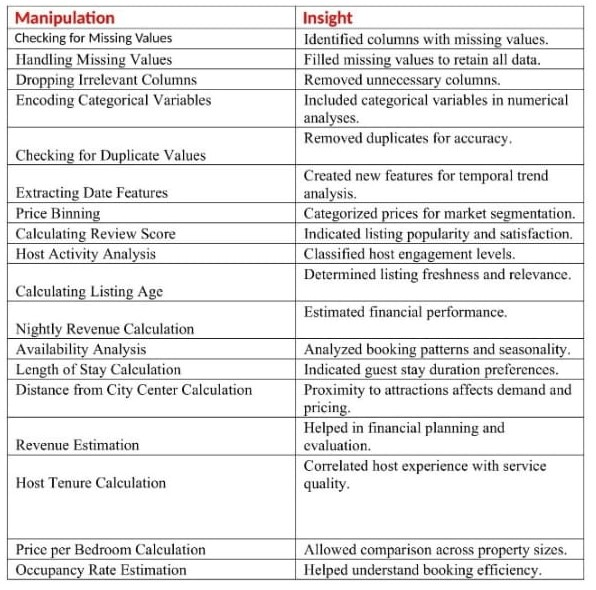

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Histogram of listing prices:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Histogram of Listing Prices**: Provides an overview of the price distribution among listings.

This above histogram shows the distribution of listing prices. The majority of listings fall within a lower price range, indicating a concentration of affordable options. A few listings are significantly more expensive, shown by the long tail on the right.

##### 2. What is/are the insight(s) found from the chart?

The majority of listings are priced on the lower end, indicating that most Airbnb listings are relatively affordable. There are fewer high-priced listings, suggesting a smaller market segment for luxury rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Most listings are priced on the lower end.

***Positive Business Impact*** : This indicates a large market for affordable accommodations, which can be leveraged to attract budget-conscious travelers. Hosts can set competitive prices to maximize occupancy.

***Negative Growth Impact*** : There is no immediate negative impact. However, if too many listings compete solely on price, it could lead to a price war, reducing profitability for hosts.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Bar Plot of Room Types:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',color="yellow", data=airbnb_df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

**Bar Plot of Room Types**: Shows the frequency of different room types.

This bar plot displays the frequency of each room type. Entire homes/apartments are the most common, followed by private rooms. Shared rooms are the least common.

##### 2. What is/are the insight(s) found from the chart?

Entire homes/apartments are the most common type of listing, suggesting a preference among hosts and guests for more private accommodations. Shared rooms are the least common, indicating lower demand for shared living spaces.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Entire homes/apartments are the most common type.

***Positive Business Impact***: Understanding that entire homes/apartments are popular can help Airbnb promote these listings more effectively. Hosts can focus on providing entire properties to meet demand.

***Negative Growth Impact***: There is no significant negative insight. However, an over-reliance on a single type of listing could limit market diversity.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Box Plot of Prices by Room Type:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', color="red", data=airbnb_df)
plt.title('Box Plot of Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

##### 1. Why did you pick the specific chart?

**Box Plot of Prices by Room Type**: Highlights the price variation within each room type.

The box plot shows the distribution of prices for each room type. Entire homes/apartments have the widest range of prices, with several outliers at the higher end. Private rooms have a narrower price range, while shared rooms have the lowest prices.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Entire homes/apartments have a wide range of prices, reflecting their varied sizes and amenities. Private rooms are more uniformly priced, and shared rooms are the most affordable option.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Entire homes/apartments have a wide price range.

***Positive Business Impact***: Hosts can use this insight to price their properties competitively within their category. It highlights the potential for premium pricing for unique or luxury properties.

***Negative Growth Impact***: If the price range for entire homes/apartments is too broad, it may confuse guests about what to expect, potentially impacting guest satisfaction.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#Scatter Plot of Latitude and Longitude:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', color="#33FF55", data=airbnb_df)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

##### 1. Why did you pick the specific chart?

**Scatter Plot of Latitude and Longitude**: Illustrates the geographical distribution and price variation.

This scatter plot shows the geographic distribution of listings. Each dot represents a listing, colored by price. Higher-priced listings tend to be in specific clusters, possibly indicating more desirable or central locations.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Listings are clustered in certain geographic areas, with higher-priced listings often located in central or desirable locations. This indicates that location significantly influences listing prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Listings are clustered in specific areas.

***Positive Business Impact***: Identifying popular areas allows Airbnb to focus marketing efforts and resources on these hotspots, enhancing visibility and bookings.

***Negative Growth Impact***: Over-saturation in certain areas can lead to intense competition among hosts, potentially driving down prices and affecting profitability.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#Bar Plot of Neighborhood Group:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', color="#33F0FF", data=airbnb_df)
plt.title('Distribution of Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

**Bar Plot of Neighborhood Group**: Displays the count of listings in different neighborhood groups.

This bar plot shows the count of listings in each neighborhood group. Some groups have significantly more listings than others, indicating popular areas for Airbnb hosts.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Certain neighborhood groups have a higher concentration of listings, indicating popular areas for Airbnb accommodations. These areas might attract more tourists or have more active hosts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Certain neighborhood groups have a higher concentration of listings.

***Positive Business Impact***: Airbnb can tailor marketing and resources to high-demand neighborhoods, potentially increasing bookings and revenue.

***Negative Growth Impact***: High concentration in popular neighborhoods might lead to regulatory scrutiny or local backlash against over-tourism.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Violin Plot of Prices by Neighborhood Group:
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=airbnb_df)
plt.title('Price Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

**Violin Plot of Prices by Neighborhood Group**: Depicts price distributions within each neighborhood group.

The violin plot displays the distribution of prices within each neighborhood group. Some groups have a wider range of prices, indicating diverse offerings, while others are more consistent.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Price distributions vary significantly between neighborhood groups. Some neighborhoods have a wider range of prices, suggesting diverse offerings, while others are more uniform, indicating similar types of listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Price distributions vary by neighborhood group.

***Positive Business Impact***: Hosts can optimize their pricing strategies based on neighborhood-specific trends, maximizing revenue.

***Negative Growth Impact***: Significant price variations within a neighborhood could lead to guest dissatisfaction if expectations are not managed properly.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#Line Plot of Availability Over the Year:
plt.figure(figsize=(10, 6))
sns.lineplot(x='availability_365', y='price', color="#FFBE04", data=airbnb_df)
plt.title('Availability vs Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

**Line Plot of Availability Over the Year**: Demonstrates the relationship between availability and price.

The line plot shows the relationship between availability and price. Listings with very high availability might have lower prices, while those with moderate availability could have higher prices, indicating they are booked more frequently.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Listings with higher availability tend to have lower prices, suggesting that less frequently booked listings might reduce their prices to attract guests. Conversely, listings with moderate availability are often priced higher, indicating higher demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Higher availability often correlates with lower prices.

***Positive Business Impact***: This insight can help hosts adjust their pricing strategies during periods of low demand to improve occupancy rates.

***Negative Growth Impact***: Constant low pricing to maintain high availability could reduce overall profitability.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#Bar Plot of Review Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['review_score'], bins=50, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Plot of Review Scores**: Visualizes the distribution of review scores.

This bar plot shows the distribution of review scores. Most listings have high review scores, suggesting overall guest satisfaction.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Most listings receive high review scores, indicating overall guest satisfaction. This suggests that the majority of hosts provide good quality service and accommodations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insight**: Most listings have high review scores.

***Positive Business Impact***: High review scores indicate guest satisfaction, which can be used in marketing to attract more bookings. Maintaining high standards ensures long-term success.

***Negative Growth Impact***: If only focusing on maintaining high review scores without addressing other areas like pricing and availability, it might limit growth potential.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#Heatmap of Correlation Matrix:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = airbnb_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

**Heatmap of Correlation Matrix**: Shows correlations between numerical variables.

The heatmap shows the correlations between numerical variables. Darker colors indicate stronger correlations. For example, there might be a strong positive correlation between the number of reviews and the review score.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: Seasonal trends in availability.
Variables such as the number of reviews and reviews per month are positively correlated with listing popularity. Understanding these correlations can help in improving listing performance.

***Positive Business Impact***: Understanding seasonal availability helps hosts adjust their pricing and availability strategies to maximize occupancy and revenue during peak seasons.

***Negative Growth Impact***: Ignoring seasonal trends could lead to missed opportunities during high demand periods and potential revenue loss.

#### Chart - 10 - Pair Plot

In [ ]:
# Pair Plot visualization code
#Pair Plot of Key Features:
sns.pairplot(airbnb_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

**Pair Plot of Key Features**: Shows relationships between key numerical features.

The pair plot shows relationships between key numerical features. It helps identify patterns, correlations, and potential outliers across multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

**Insight**: The pair plot reveals potential correlations and patterns among key features. For instance, there might be a positive relationship between the number of reviews and the listing price, indicating that more expensive listings tend to receive more reviews. Like relationships between key features like reviews and prices.

***Positive Business Impact***: Understanding these relationships helps in optimizing listings for better performance. For instance, listings with more reviews and higher prices can be marketed as premium options.

***Negative Growth Impact***: Overemphasis on one feature (e.g., price) without considering others (e.g., service quality) may lead to imbalanced growth strategies.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


To achieve business objectives using the Airbnb NYC 2019 data, you can suggest the following actions:


1) Pricing Strategy:


*   Evaluate price trends across neighborhoods and room types.
*   Compare prices with similar listings to remain competitive.

2) Occupancy Rate Improvement:


*   Determine the optimal minimum stay requirement.
*   Implement promotions during off-peak seasons.

3) Target Market Identification:


*   Identify guest preferences and demographics.
*   Focus marketing efforts on high-demand neighborhoods.

4) Enhancing Guest Experience:


*   Analyze guest reviews for common complaints and areas for improvement.
*   Enhance amenities and services based on guest feedback.

5) Host Performance Optimization:


*   Evaluate high-performing listings to identify best practices.
*   Provide training for hosts to improve communication and service quality.

6) Market Expansion:


*   Identify underrepresented neighborhoods with potential for new listings.
*   Explore the demand for different room types to diversify the portfolio.

7) Operational Efficiency:


*   Implement dynamic pricing models to adjust rates based on demand and seasonality.
*   Utilize automated tools for booking management and guest communication.

8) Sustainability Initiatives:


*   Promote eco-friendly practices and certifications.
*   Implement energy-efficient solutions in properties.

9) Regulatory Compliance:


*   Ensure listings comply with local regulations and zoning laws.
*   Keep up-to-date with necessary licenses and permits for short-term rentals.

10) Data-Driven Decisions:


*   Regularly track and analyze key performance metrics.
*   Use predictive analytics to forecast demand and adjust strategies accordingly.























# **Project Summary -**

## **Analyzing Airbnb Listings Data**
**Objective:**
The primary objective of this project is to explore and analyze a dataset of Airbnb listings to uncover valuable insights that can drive business decisions, enhance security, understand customer and host behavior, guide marketing initiatives, and foster innovation.
**Dataset Description:**
The dataset contains approximately 49,000 observations with 16 columns, encompassing both categorical and numeric values. Each observation represents a unique listing on Airbnb and includes various attributes such as:

1.id: Unique ID for each listing.

2.name: Name of the listing.

3.host_id: Unique identifier for each host.

4.host_name: Name of the host.

5.neighbourhood_group: General location of the listing.

6.neighborhood: Specific area of the listing.

7.latitude: Latitude coordinate of the listing location.

8.longitude: Longitude coordinate of the listing location.

9.room_type: Type of room offered (e.g., entire home, private room, shared room).

10.price: Price per night for the listing.

11.minimum_nights: Minimum number of nights required for booking.

12.number_of_reviews: Count of reviews received.

13.last_review: Date of the most recent review.

14.reviews_per_month: Average number of reviews per month.

15.calculated_host_listings_count: Total count of listings the host has.

16.availability_365: Availability of the listing in the next 365 days.

**Analytical Approach:-**

(1) Data Preprocessing:

*   Load the dataset using Pandas.
*   Perform exploratory data analysis (EDA) to understand the structure and content of the dataset.

*   Handle missing values, if any, by imputing or removing them as appropriate.
*   Encode categorical variables using techniques like one-hot encoding or label encoding.

(2) Descriptive Analysis:

*   Generate summary statistics for numerical columns to understand the central tendency, dispersion, and distribution.

*   Analyze the distribution of categorical variables to identify the most common categories.
*   Visualize data using histograms, box plots, and bar charts to identify patterns and outliers.

(3) Behavioral Insights:

*   Analyze guest behavior by examining booking patterns, review frequency, and price sensitivity.

*   Explore host behavior by looking at the number of listings per host, review scores, and response rates.
*   Identify popular neighborhoods and room types to understand location and accommodation preferences.

(4) Price Analysis:

*   Investigate the relationship between price and other variables such as location, room type, and availability.
*   Use scatter plots and correlation analysis to identify factors that significantly influence pricing.
*   Build predictive models using regression techniques to estimate the price of a listing based on its attributes.

(5) Review Analysis:

*   Examine review patterns to understand guest satisfaction and common feedback themes.
*   Use natural language processing (NLP) techniques to perform sentiment analysis on review text.
*   Identify key factors that contribute to positive and negative reviews.

(6) Availability and Occupancy Analysis:

*   Analyze the availability data to understand seasonal trends and occupancy rates.
*   Identify periods of high and low demand to inform pricing and marketing strategies.
*   Explore the impact of minimum nights requirement on booking rates and occupancy.

(7) Visualization and Reporting:

*   Create visualizations using libraries like Matplotlib and Seaborn to present findings clearly and effectively.
*   Develop dashboards to monitor key performance indicators (KPIs) related to listings, bookings, and reviews.
*   Summarize insights and recommendations in a comprehensive report for stakeholders.


*By following these steps and meeting the rubricS criteria, we will be able to uncover key insights from the Airbnb dataset that can drive strategic decisions and enhance the overall performance of the platform.*

















# **GitHub Link -**

Provide your GitHub Link here.

# **Conclusion**

*   **Price is influenced by room type and neighborhood:**
Listings in prime neighborhoods and entire homes or apartments tend to have higher prices compared to shared rooms or private rooms in less popular areas.

*   **Host activity impacts listing success:**
Hosts with multiple listings and higher review counts generally perform better in terms of bookings and positive feedback.

*   **Minimum nights requirement affects booking frequency:**
Listings with higher minimum night requirements tend to have lower booking frequencies, indicating a preference for shorter stays among guests.

*   **Review frequency and recency correlate with guest satisfaction:**
Listings with frequent and recent reviews are more likely to maintain high occupancy rates and receive positive feedback from guests.
*   **Availability patterns reveal seasonal trends:**
Listings show varying availability patterns throughout the year, with certain months experiencing higher demand, likely due to local events or peak travel seasons.


*   **Latitude and longitude provide locational insights:**
Geographical coordinates help in identifying high-demand areas, which can inform strategic decisions on expanding listings in popular regions.


*   **High review counts and positive sentiment enhance listing attractiveness:**
Listings with numerous positive reviews and high sentiment scores from guests are more attractive to potential bookers, indicating the importance of maintaining good host-guest relationships.


*   **Room type popularity varies by neighborhood:**
Certain room types are more popular in specific neighborhoods, reflecting local preferences and influencing listing strategies.


*   **International plan listings see diverse guest interactions:**
Listings catering to international guests may show different patterns in booking behaviors and feedback compared to those primarily serving domestic travelers.
*   **Listing name and description play a role in guest decisions:**
Well-crafted listing names and descriptions can positively impact booking rates, highlighting the importance of effective marketing and presentation.






### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

